<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Artificial Neural networks
We will construct a basic nueral net to try to find a fit to the function:
$\sqrt{x}\cdot\sin(x)$.

We will first need to get our training day, in this case it will be 100 points in the interval $[0,3]$. The following code was partially generated with Chat-GPT, but the explainations are adapted by me and the premise of this example is mine.

In [24]:
def func(x):
    return np.sqrt(x)*np.sin(x)**2

# Generate training data
x_train = np.linspace(0, 3, 100).reshape(-1, 1)
y_train = func(x_train)

# Activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

We first have to initialize our weights and bias, which are represented as baises vectors

In [25]:
# Initialize weights and biases and learn rate
learning_rate = 0.01
input_size = 1
hidden_size = 64
output_size = 1

weights1 = np.random.randn(1, hidden_size) * 0.1
bias1 = np.zeros((1, hidden_size))
weights2 = np.random.randn(hidden_size, output_size) * 0.1
bias2 = np.zeros((1, output_size))

Our hidden input is the intermediate process that performs calculation based on weights, biases, and activation function. Here, our activation fuction is a postive ReLU funciton. Here our singnal either passes through untouched or dies completely

In [26]:
hidden_input = np.dot(x_train, weights1) + bias1
hidden_output = relu(hidden_input)
final_output = np.dot(hidden_output, weights2) + bias2

Now we will compute our loss and impliment the back propigation algorithm, which will update the weights to fine tune our algorithm.

In [27]:
loss = np.mean((final_output - y_train) ** 2)

# Backward pass
d_loss_output = 2 * (final_output - y_train) / y_train.shape[0]
d_weights2 = np.dot(hidden_output.T, d_loss_output)
d_bias2 = np.sum(d_loss_output, axis=0, keepdims=True)

# Hidden layer gradient
d_hidden_output = np.dot(d_loss_output, weights2.T)
d_hidden_input = d_hidden_output * relu_derivative(hidden_input)
d_weights1 = np.dot(x_train.T, d_hidden_input)
d_bias1 = np.sum(d_hidden_input, axis=0, keepdims=True)
weights1 -= learning_rate * d_weights1
bias1 -= learning_rate * d_bias1
weights2 -= learning_rate * d_weights2
bias2 -= learning_rate * d_bias2



Now let's see what happens after one iteration.

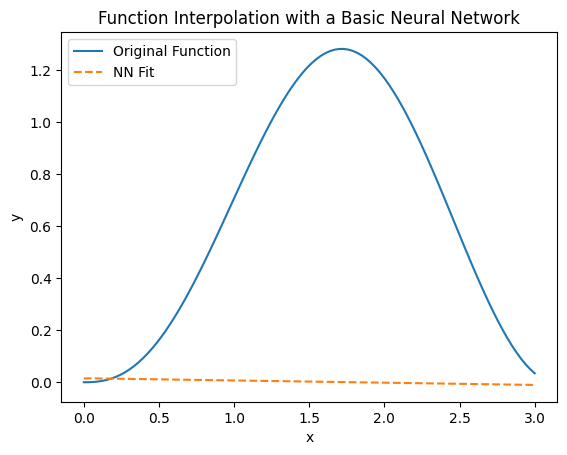

In [28]:
# Test the network with new inputs
x_test = np.linspace(0, 3, 100).reshape(-1, 1)
hidden_input = np.dot(x_test, weights1) + bias1
hidden_output = relu(hidden_input)
y_pred = np.dot(hidden_output, weights2) + bias2

# Plot the results
plt.plot(x_train, y_train, label='Original Function')
plt.plot(x_test, y_pred, label='NN Fit', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Function Interpolation with a Basic Neural Network')
plt.show()

In machine learning, the term epoch refers to one complete pass through the entire training dataset by the learning algorithm. We will train our algorithm on 1000 epochs.

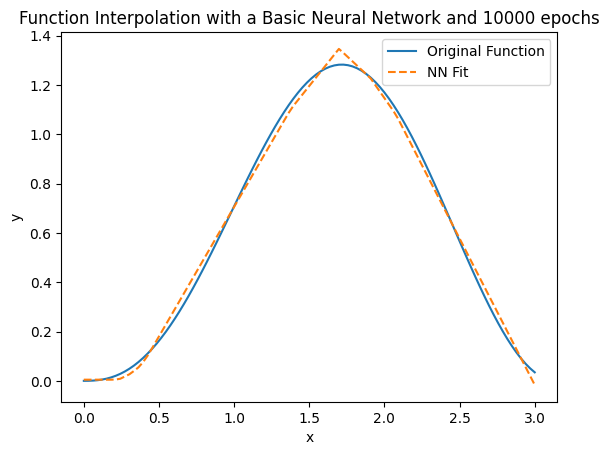

In [29]:
# Initialize weights and biases
np.random.seed(0)
input_size = 1
hidden_size = 64
output_size = 1

weights1 = np.random.randn(input_size, hidden_size) * 0.1
bias1 = np.zeros((1, hidden_size))
weights2 = np.random.randn(hidden_size, output_size) * 0.1
bias2 = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.01
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(x_train, weights1) + bias1
    hidden_output = relu(hidden_input)
    final_output = np.dot(hidden_output, weights2) + bias2

    # Compute loss (Mean Squared Error)
    loss = np.mean((final_output - y_train) ** 2)

    # Backward pass
    # Output layer gradient
    d_loss_output = 2 * (final_output - y_train) / y_train.shape[0]
    d_weights2 = np.dot(hidden_output.T, d_loss_output)
    d_bias2 = np.sum(d_loss_output, axis=0, keepdims=True)

    # Hidden layer gradient
    d_hidden_output = np.dot(d_loss_output, weights2.T)
    d_hidden_input = d_hidden_output * relu_derivative(hidden_input)
    d_weights1 = np.dot(x_train.T, d_hidden_input)
    d_bias1 = np.sum(d_hidden_input, axis=0, keepdims=True)

    # Update weights and biases
    weights1 -= learning_rate * d_weights1
    bias1 -= learning_rate * d_bias1
    weights2 -= learning_rate * d_weights2
    bias2 -= learning_rate * d_bias2


# Test the network with new inputs
x_test = np.linspace(0, 3, 100).reshape(-1, 1)
hidden_input = np.dot(x_test, weights1) + bias1
hidden_output = relu(hidden_input)
y_pred = np.dot(hidden_output, weights2) + bias2

# Plot the results
plt.plot(x_train, y_train, label='Original Function')
plt.plot(x_test, y_pred, label='NN Fit', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Function Interpolation with a Basic Neural Network and {epochs} epochs')
plt.show()

Now 10000 epochs.

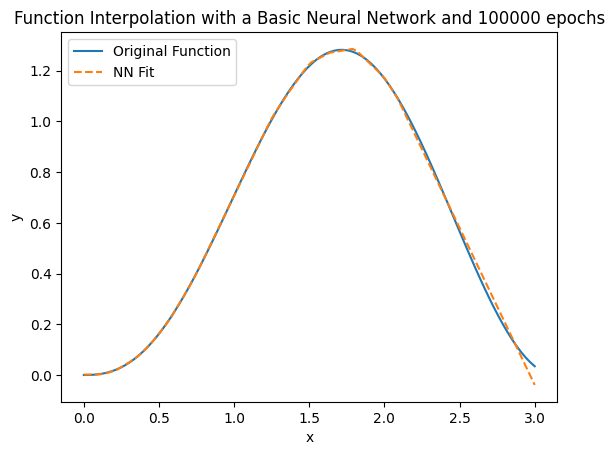

In [30]:
# Initialize weights and biases
np.random.seed(0)
input_size = 1
hidden_size = 64
output_size = 1

weights1 = np.random.randn(input_size, hidden_size) * 0.1
bias1 = np.zeros((1, hidden_size))
weights2 = np.random.randn(hidden_size, output_size) * 0.1
bias2 = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.01
epochs = 100000

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(x_train, weights1) + bias1
    hidden_output = relu(hidden_input)
    final_output = np.dot(hidden_output, weights2) + bias2

    # Compute loss (Mean Squared Error)
    loss = np.mean((final_output - y_train) ** 2)

    # Backward pass
    # Output layer gradient
    d_loss_output = 2 * (final_output - y_train) / y_train.shape[0]
    d_weights2 = np.dot(hidden_output.T, d_loss_output)
    d_bias2 = np.sum(d_loss_output, axis=0, keepdims=True)

    # Hidden layer gradient
    d_hidden_output = np.dot(d_loss_output, weights2.T)
    d_hidden_input = d_hidden_output * relu_derivative(hidden_input)
    d_weights1 = np.dot(x_train.T, d_hidden_input)
    d_bias1 = np.sum(d_hidden_input, axis=0, keepdims=True)

    # Update weights and biases
    weights1 -= learning_rate * d_weights1
    bias1 -= learning_rate * d_bias1
    weights2 -= learning_rate * d_weights2
    bias2 -= learning_rate * d_bias2


# Test the network with new inputs
x_test = np.linspace(0, 3, 100).reshape(-1, 1)
hidden_input = np.dot(x_test, weights1) + bias1
hidden_output = relu(hidden_input)
y_pred = np.dot(hidden_output, weights2) + bias2

# Plot the results
plt.plot(x_train, y_train, label='Original Function')
plt.plot(x_test, y_pred, label='NN Fit', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Function Interpolation with a Basic Neural Network and {epochs} epochs')
plt.show()

Now we see as expected the more amount of training rounds or epochs, the better the algorithm is.